# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для этой цели будем использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Необходимо выполнить этапы:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [128]:
# Загрузим необходимые для работы библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from numpy.random import RandomState
pd.options.mode.chained_assignment = None

Все данные разделены на три таблицы: обучающую выборку, тестовую выборку и исходные данные. Сохраним их в отдельных таблицах.

In [129]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv') # - обучающая выборка
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv') # - тестовая выборка
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv') # - исходные данные

Изучим каждую выборку в отдельности.

In [130]:
# Посмотрим на первые 10 строк обучающей выборки
df_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [131]:
# Посмотрим на первые 10 строк тестовой выборки
df_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [132]:
# Посмотрим на первые 10 строк исходных данных
df_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [133]:
# Изучим информацию об обучающей выборке
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [134]:
# Изучим информацию о тестовой выборке
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [135]:
# Изучим информацию об исходных данных
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

Можно обратить внимание на то, что в обучающей и исходной выборках 87 столбцов, а в тестовой - 53. Это связано с тем, что некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Согласно приложенной документации:
Технологический процесс
- Rougher feed — исходное сырье;
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant;
- Xanthate **— ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия);
- Rougher process (англ. «грубый процесс») — флотация;
- Rougher tails — отвальные хвосты;
- Float banks — флотационная установка;
- Cleaner process — очистка;
- Rougher Au — черновой концентрат золота;
- Final Au — финальный концентрат золота.

Параметры этапов.

- air amount — объём воздуха;
- fluid levels — уровень жидкости;
- feed size — размер гранул сырья;
- feed rate — скорость подачи.

Наименование признаков

Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag.
Возможные значения для блока [этап]:
- rougher — флотация;
- primary_cleaner — первичная очистка;
- secondary_cleaner — вторичная очистка;
- final — финальные характеристики.

Возможные значения для блока [тип_параметра]:

- input — параметры сырья;
- output — параметры продукта;
- state — параметры, характеризующие текущее состояние этапа;
- calculation — расчётные характеристики.

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.

In [136]:
# Вычислим эффективность обогащения на обучающей выборке
recovery_train = pd.DataFrame()
recovery_train = (((df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - 
                                                                 df_train['rougher.output.tail_au'])) / 
                   (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - 
                                                         df_train['rougher.output.tail_au']))) * 100)

Прежде, чем найти среднюю абсолютную ошибку между нашими расчетами и значением признака, сравним их размерность и наличие пропусков.

In [137]:
recovery_train.shape # - размерность вычисленной эффективноси

(14149,)

In [138]:
print('Количество пропусков в вычисленной эффективности:', recovery_train.isna().sum())

Количество пропусков в вычисленной эффективности: 0


In [139]:
df_train['rougher.output.recovery'].shape

(14149,)

In [140]:
print('Количество пропусков среди значений признака:', recovery_train.isna().sum())

Количество пропусков среди значений признака: 0


Размерность одинаковая. Пропуски отсутствуют. Значит можно на следующем этапе вычислить среднюю абсолютную ошибку.

In [141]:
print('Средняя абсолютная ошибка между расчетом и значением признака:', mean_absolute_error(df_train['rougher.output.recovery'], recovery_train))

Средняя абсолютная ошибка между расчетом и значением признака: 9.682896147825551e-15


Очень низкое значение MAE говорит о том, что табличному значению эффективности можно доверять.

In [142]:
# Найдем признаки, недоступные в тестовой выборке
result = []
for element in df_train:
    if element not in df_test:
        result.append(element)  
result

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Мы видим, что все пропущенные признаки в тестовой модели относятся к типу output.

Добавим целевые признаки путем сопоставления даты из полной таблицы с помощью метода merge.

In [143]:
targets_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date')
targets_test =targets_test[['rougher.output.recovery', 'final.output.recovery']]

In [144]:
# Выделим целевые признаки в обучающей выборке
targets_train = df_train[['rougher.output.recovery', 'final.output.recovery']]

**Предобработка данных**

In [145]:
# Проверим данные на наличие дубликатов
print('Количество дубликатов в обучающей выборке:', df_train.duplicated().sum())
print('Количество дубликатов в тестовой выборке:', df_test.duplicated().sum())
print('Количество дубликатов в исходных данных:', df_full.duplicated().sum())

Количество дубликатов в обучающей выборке: 0
Количество дубликатов в тестовой выборке: 0
Количество дубликатов в исходных данных: 0


In [146]:
# Изменим тип данных в столбце date
def to_datetime(df):
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    
to_datetime(df_train)
to_datetime(df_test)
to_datetime(df_full)

In [147]:
# Проверим данные на наличие пропусков
def isna(df):
    print(df.isna().sum().sort_values(ascending=False))
    
isna(df_train)
isna(df_test)
isna(df_full)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.state.floatbank10_e_level              0
rougher.state.floatbank10_f_air                0
rougher.state.floatbank10_f_level              0
rougher.output.concentrate_pb                  0
date                                           0
Length: 87, dtype: int64
rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.sulfate                  4
primary_cleaner.input.xanthate                 4
secondary_cleaner.state.floatbank2_a_air    

Мы видим, что пропусков в наших данных немного. Удалять их нецелесообразно, так это может повлиять отрицательно повлиять на дальнейший анализ. Поэтому заменим их предыдущими значениями.

In [148]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

In [149]:
# Оставим в обучающей выборке столбцы, которые есть в тестовой выборке
df_train = df_train[df_test.columns]

**Вывод**

На этапе подготовки данных был произведен расчет эффективности обогащения и произведено сравнение с табличным значением, в результате чего можно говорить о корректности табличных данных. Также было установлено, что в тестовой модели отсутствуют признаки, относящиеся к типу output. Далее была произведена замена пропусков предыдущими по дате значениями.

## Анализ данных

 Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Для этого построим гистограммы для каждого металла.

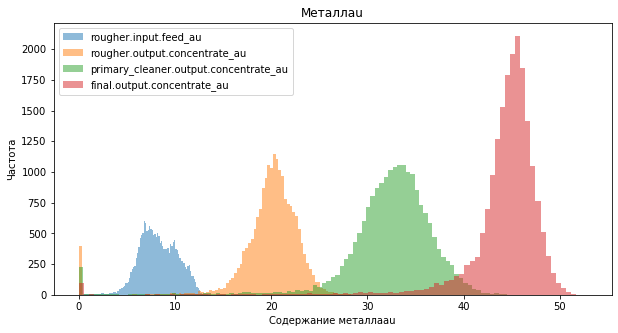

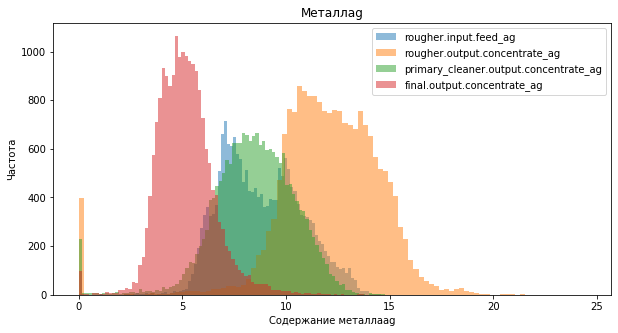

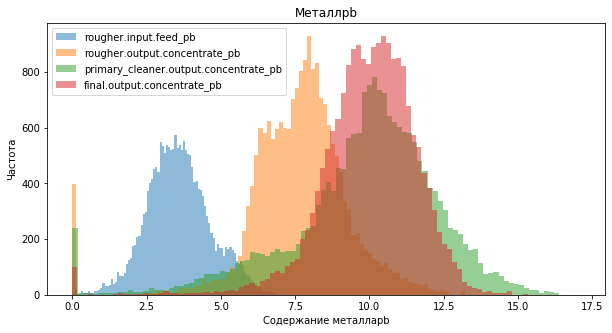

In [150]:
metall = ['au', 'ag', 'pb']
for i in metall:
    plt.figure(figsize=(10, 5))
    plt.title('Металл' + i)
    plt.xlabel('Содержание металла' + i)
    plt.ylabel('Частота')
    plt.hist(df_full['rougher.input.feed_' + i], alpha=0.5, label='rougher.input.feed_' + i, bins = 100)
    plt.hist(df_full['rougher.output.concentrate_' + i], alpha=0.5, label='rougher.output.concentrate_' + i, bins = 100)
    plt.hist(df_full['primary_cleaner.output.concentrate_' + i], alpha=0.5, label='primary_cleaner.output.concentrate_' + i, bins = 100)
    plt.hist(df_full['final.output.concentrate_' + i], alpha=0.5, label='final.output.concentrate_' + i, bins = 100)
    
    plt.legend()
    plt.show()

Концентрация металлов на разных этапах очистки отличается. У металлов au и pb самый высокий показатель на стадиях final.output.concentrate, а у ag - rougher.output.concentrate.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

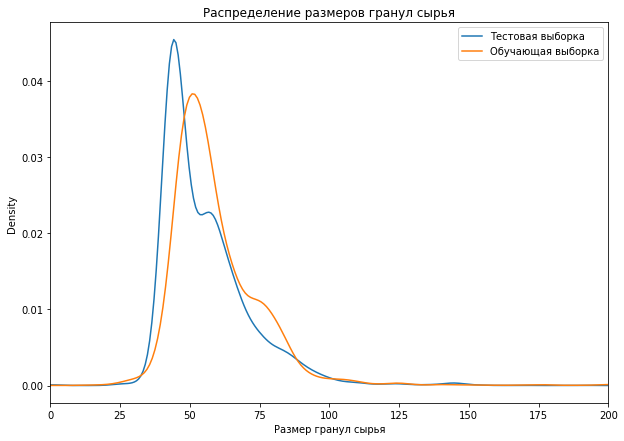

In [151]:
# Построим графики плотности распределения для обучающей и тестовой выборок
plt.figure(figsize=(10, 7))
plt.title('Распределение размеров гранул сырья')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность распределения')
df_test['rougher.input.feed_size'].plot.kde()
df_train['rougher.input.feed_size'].plot.kde()
plt.xlim([0, 200])
plt.legend(['Тестовая выборка', 'Обучающая выборка'])
plt.show()

Мы видим, что в целом характер распределения размеров гранул сырья на обучающей и тестовой выборках похож. В связи с этим можно установить, что оценка модели в дальнейшем будет корректна.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [152]:
# Построим функцию для нахождения суммарной концентрации всех веществ
def sum_concentrate(ag, pb, au, sol):
    total = ag + pb + au + sol
    return total

In [153]:
# Суммарная концентрация всех веществ на стадии сырья
rougher = sum_concentrate(df_full['rougher.output.concentrate_ag'], df_full['rougher.output.concentrate_pb'], 
                                df_full['rougher.output.concentrate_au'], df_full['rougher.output.concentrate_sol'])

# Суммарная концентрация всех веществ в черновом концентрате
primary_cleaner = sum_concentrate(df_full['primary_cleaner.output.concentrate_ag'], df_full['primary_cleaner.output.concentrate_pb'], 
                                df_full['primary_cleaner.output.concentrate_au'], df_full['primary_cleaner.output.concentrate_sol'])

# Суммарная концентрация всех веществ в финальном концентрате
final = sum_concentrate(df_full['final.output.concentrate_ag'], df_full['final.output.concentrate_pb'], 
                                df_full['final.output.concentrate_au'], df_full['final.output.concentrate_sol'])

Построим гистограммы суммарной концентрации всех веществ на каждом этапе.

In [154]:
def hists(df, name):
    plt.figure(figsize=(10, 8))
    plt.title(name)
    plt.xlabel('Суммарная концентрация всех веществ')
    plt.ylabel('Частота')
    plt.hist(x=df, bins=30)
    plt.show()

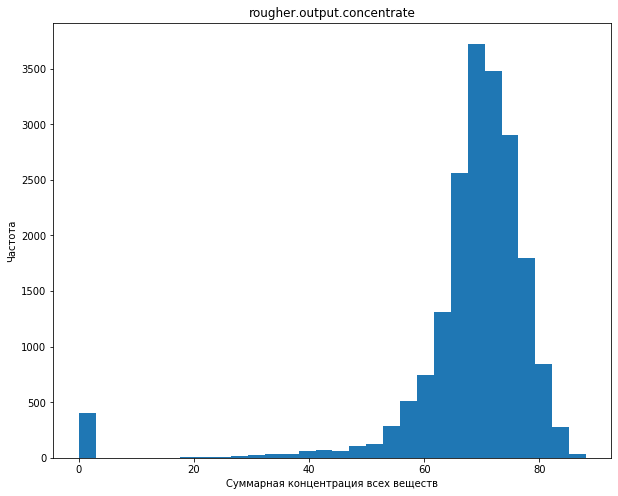

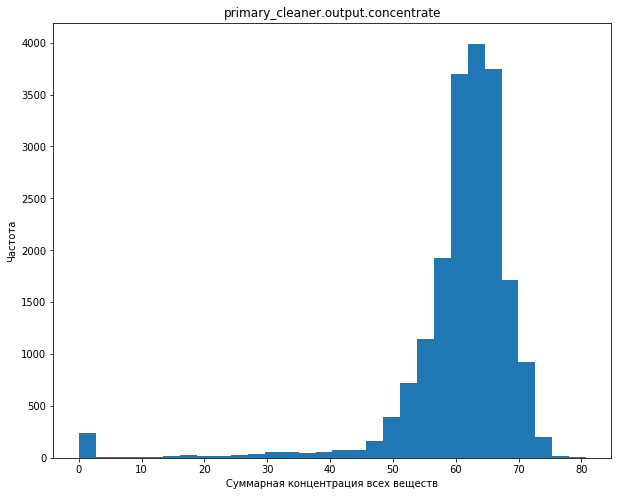

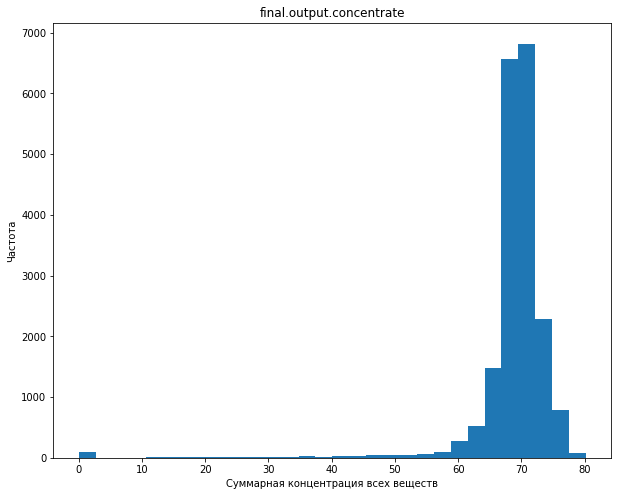

In [155]:
hists(rougher, 'rougher.output.concentrate')
hists(primary_cleaner, 'primary_cleaner.output.concentrate')
hists(final, 'final.output.concentrate')

Мы видим, что графики на каждом этапе имеют распределение, близкое к нормальному, если отбросить выбросы около нулевой отметки.

In [156]:
# Напишим функцию для удаления выбросов около нулевой отметки
def del_outliers(df, element):
    df = df[df[element] > 1]
    return df

In [157]:
# Удалим выбросы
elements = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au',
          'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
          'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_ag',
          'final.output.concentrate_pb', 'final.output.concentrate_au', 'final.output.concentrate_sol']
for i in elements:
    df_full = del_outliers(df_full, i)

## Модель

Напишим функцию для вычисления sMAPE.

In [158]:
def sMAPE(target, pred):
    result = (
        (abs(target - pred) / 
        ((abs(target) + abs(pred)) / 2)) * 100
    )
    
    return result.sum() / len(target)

In [159]:
# Удалим столбец date из обучающей и тестовой выборок
df_train = df_train.drop(['date'], axis=1)
df_test = df_test.drop(['date'], axis=1)

Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. 

### Модель линейной регрессии

In [160]:
sample_size = int(len(df_train) / 5)
scores = []

for i in range(0, len(df_train), sample_size):
    features_valid = df_train[i: i + sample_size]
    features_train = df_train.drop(features_valid.index)

    target_valid = targets_train[i: i + sample_size]
    target_train = targets_train.drop(target_valid.index)

    model_LR = LinearRegression()
    model_LR.fit(features_train, target_train)

    predict = model_LR.predict(features_valid)

    scores.append(sMAPE(target_valid, predict))

print('Итоговый sMAPE:', (sum(scores) / len(scores))[0] * 0.25 + (sum(scores) / len(scores))[1] * 0.75)

Итоговый sMAPE: 11.175617869924942


### Модель решающего дерева

In [161]:
scores = []

for depth in range(1, 10):
    for i in range(0, len(df_train), sample_size):
        features_valid = df_train[i: i + sample_size]
        features_train = df_train.drop(features_valid.index)

        target_valid = targets_train[i: i + sample_size]
        target_train = targets_train.drop(target_valid.index)

        model_DTR = DecisionTreeRegressor(random_state = 12345, max_depth=depth)
        model_DTR.fit(features_train, target_train)

        predict = model_DTR.predict(features_valid)

        scores.append(sMAPE(target_valid, predict))
    
    result = (sum(scores) / len(scores))[0] * 0.25 + (sum(scores) / len(scores))[1] * 0.75
    print('Итоговый sMAPE при depth =', str(depth) + ':', result)

Итоговый sMAPE при depth = 1: 10.385975431848284
Итоговый sMAPE при depth = 2: 10.337490893088074
Итоговый sMAPE при depth = 3: 10.265876043863024
Итоговый sMAPE при depth = 4: 10.113587411939557
Итоговый sMAPE при depth = 5: 10.031606289727666
Итоговый sMAPE при depth = 6: 10.015905507404057
Итоговый sMAPE при depth = 7: 10.07287472881334
Итоговый sMAPE при depth = 8: 10.345215056860093
Итоговый sMAPE при depth = 9: 10.814476933095364


### Модель случайного леса

In [162]:
scores = []

for est in range(1, 6):
    for depth in range (1, 6):
        for i in range(0, len(df_train), sample_size):
            features_valid = df_train[i: i + sample_size]
            features_train = df_train.drop(features_valid.index)

            target_valid = targets_train[i: i + sample_size]
            target_train = targets_train.drop(target_valid.index)
            
            model_RFR = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
            model_RFR.fit(features_train, target_train)
    
            predict = model_RFR.predict(features_valid)

            scores.append(sMAPE(target_valid, predict))

        print('Итоговый sMAPE при depth =', str(depth) + ':', 'и est =', str(est) + ':', (sum(scores) / len(scores))[0] * 0.25 + (sum(scores) / len(scores))[1] * 0.75)

Итоговый sMAPE при depth = 1: и est = 1: 11.004831901898022
Итоговый sMAPE при depth = 2: и est = 1: 10.84855714868686
Итоговый sMAPE при depth = 3: и est = 1: 10.550298722140237
Итоговый sMAPE при depth = 4: и est = 1: 10.305971424762474
Итоговый sMAPE при depth = 5: и est = 1: 10.157136431221824
Итоговый sMAPE при depth = 1: и est = 2: 10.247291468590245
Итоговый sMAPE при depth = 2: и est = 2: 10.245662650221352
Итоговый sMAPE при depth = 3: и est = 2: 10.20813399588743
Итоговый sMAPE при depth = 4: и est = 2: 10.152107491997636
Итоговый sMAPE при depth = 5: и est = 2: 10.088052535879939
Итоговый sMAPE при depth = 1: и est = 3: 10.12332725563584
Итоговый sMAPE при depth = 2: и est = 3: 10.121547090161071
Итоговый sMAPE при depth = 3: и est = 3: 10.100893158325333
Итоговый sMAPE при depth = 4: и est = 3: 10.062324705233484
Итоговый sMAPE при depth = 5: и est = 3: 10.018979854935877
Итоговый sMAPE при depth = 1: и est = 4: 10.043267254334488
Итоговый sMAPE при depth = 2: и est = 4: 10

Таким образом, наилучший результат продемонстрировала модель случайного леса при depth = 5 и est = 5.

Перед проверкой модели на тестовой выборке обучим нашу модель на всей обучающей выборке, чтобы не упустить часть обучающих данных.

In [163]:
model_RFR = RandomForestRegressor(random_state=12345, n_estimators=5, max_depth=5)
model_RFR = model_RFR.fit(df_train, targets_train)

### Проверка модели на тестовой выборке

Осуществим проверку нашей модели на тестовой выборке и сравним ее с константной моделью.

In [164]:
predict = model_RFR.predict(df_test)
result = sMAPE(targets_test, predict)
print('Итоговый sMAPE:', result[0] * 0.25 + result[1] * 0.75)

Итоговый sMAPE: 9.030287805526264


In [165]:
# Обучим константную модель
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(df_train, targets_train)
base_pred = dummy_regr.predict(df_test)
base_result = sMAPE(targets_test, base_pred)
print('Итоговый sMAPE:', base_result[0] * 0.25 + base_result[1] * 0.75)

Итоговый sMAPE: 10.28963037602106


Итоговый sMAPE на тестовой выборке меньше, полученный с помощью обученной модели, меньше, чем у константной модели, что говорит о ее эффективности. 

**Вывод**

В итоге была составлена наиболее эффективная модель, способная предсказать коэффициент восстановления золота из золотосодержащей руды. Данная модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. На тестовой выборке она показала результат выше, чем на тренировочной - итоговый sMAPE равен 9.03.